# Basic idea
The Logsitic regression is used to predict the probability of a data point belonging to a specific class. It is based on linear regression. The major difference is that logistic regreesion will have an activation function $\sigma$ at the final stage to change the predicted values of the linear regression to the values that indicate classes. In the case of binary classification, the outcome of $\sigma$ will be between $0$ and $1$, which is related to the two classes respectively. In this case, the number is interepted as the probability of the data to be in one of the specific class.

The model for Logistic regression is as follows:

$$
p=\sigma(L(x))=\sigma\left(\theta_0+\sum_{j=1}^n\theta_jx_j\right)=\sigma\left(\Theta \hat{x}^T\right).
$$

In most cases, this activation function is chosen to be the Sigmoid funciton.

## Sigmoid function

The *Sigmoid* function is defined as follows:

$$
\sigma(z)=\frac{1}{1+\mathrm{e}^{-z}}.
$$
The graph of the function is shown below.

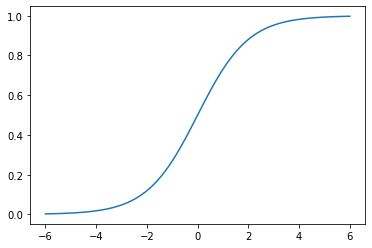

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1001)
y = 1/(1+np.exp(-x))
_ = plt.plot(x, y)

The main properties of $\sigma$ are listed below as a Lemma.

```{prf:lemma}
:label: sigmoid_property
The Sigmoid function $\sigma(z)$ satisfies the following properties.

1. $\sigma(z)\rightarrow \infty$ when $z\mapsto \infty$.
2. $\sigma(z)\rightarrow -\infty$ when $z\mapsto -\infty$.
3. $\sigma(0)=0.5$.
4. $\sigma(z)$ is always increasing.
5. $\sigma'(z)=\sigma(z)(1-\sigma(z))$.

```

```{prf:proof}
We will only look at the last one.

$$
\begin{split}
\sigma'(z)&=-\frac{(1+\mathrm e^{-z})'}{(1+\mathrm e^{-z})^2}=\frac{\mathrm e^{-z}}{(1+\mathrm e^{-z})^2}=\frac{1}{1+\mathrm e^{-z}}\frac{\mathrm e^{-z}}{1+\mathrm e^{-z}}\\
&=\sigma(z)\left(\frac{1+\mathrm e^{-z}}{1+\mathrm e^{-z}}-\frac{1}{1+\mathrm e^{-z}}\right)=\sigma(z)(1-\sigma(z)).
\end{split}
$$
```


## Gradient descent
Assume that we would like to minimize a function $J(\Theta)$, where this $\Theta$ is an $N$-dim vector. Geometricly, we could treat $J$ as a height function, and it tells us the height of the mountain. Then to minimize $J$ is the same thing as to find the lowest point. One idea is to move towards the lowest point step by step. During each step we only need to lower our current height. After several steps we will be around the lowest point.

The geometric meaning of $\nabla J$ is the direction that $J$ increase the most. Therefore the opposite direction is the one we want to move in. The formula to update $x$ is 

$$
\Theta_{\text{new}} = \Theta_{\text{old}}-\alpha \nabla J(\Theta_{\text{old}}),
$$
where $\alpha$ is called the *learning rate* which controls how fast you want to learn. Usually if $\alpha$ is small, the learning tends to be slow and stble, and when $\alpha$ is big, the learning tends to be fast and unstable.

In machine learning, in most cases we would like to formulate the problem in terms of finding the lowest point of a *cost function* $J(\Theta)$. Then we could start to use Logistic regression to solve it. For binary classification problem, the cost function is defined to be

$$
J(\Theta)=-\frac1m\sum_{i=1}^m\left[y^{(i)}\log(p^{(i)})+(1-y^{(i)})\log(1-p^{(i)})\right].
$$
Here $m$ is the number of data points, $y^{(i)}$ is the labelled result (which is either $0$ or $1$), $p^{(i)}$ is the predicted value (which is between $0$ and $1$). 

```{note}
The algorithm gets its name since we are using the gradient to find a direction to lower our height. 
```

## The Formulas
````{prf:theorem}
The gradient of $J$ is computed by

```{math}
:label: eqn-nablaJ
\nabla J =\frac1m(\textbf{p}-\textbf{y})^T\hat{\textbf{X}}.
```
````

````{toggle}

```{prf:proof}
The formula is an application of the chain rule for the multivariable functions.

$$
\begin{split}
\dfrac{\partial p}{\partial \theta_k}&=\dfrac{\partial}{\partial \theta_k}\sigma\left(\theta_0+\sum_{j=1}^n\theta_jx_j\right)=\dfrac{\partial}{\partial \theta_k}\sigma(L(\Theta))\\
&=\sigma(L)(1-\sigma(L))\dfrac{\partial}{\partial \theta_k}\left(\theta_0+\sum_{j=1}^n\theta_jx_j\right)\\
&=\begin{cases}
p(1-p)&\text{ if }k=0,\\
p(1-p)x_k&\text{ otherwise}.
\end{cases}
\end{split}
$$
Then 

$$
\nabla p = \left(\frac{\partial p}{\partial\theta_0},\ldots,\frac{\partial p}{\partial\theta_n}\right) = p(1-p)\hat{x}.
$$

Then 

$$
\nabla \log(p) = \frac{\nabla p}p =\frac{p(1-p)\hat{x}}{p}=(1-p)\hat{x}.
$$

$$
\nabla \log(1-p) = \frac{-\nabla p}{1-p} =-\frac{p(1-p)\hat{x}}{1-p}=-p\hat{x}.
$$

Then 

$$
\begin{split}
\nabla J& = -\frac1m\sum_{i=1}^m\left[y^{(i)}\nabla \log(p^{(i)})+(1-y^{(i)})\nabla \log(1-p^{(i)})\right]\\
&=-\frac1m\sum_{i=1}^m\left[y^{(i)}(1-p^{(i)})\hat{x}^{(i)}+(1-y^{(i)})(-p^{(i)}\hat{x}^{(i)})\right]\\
&=-\frac1m\sum_{i=1}^m\left[(y^{(i)}-p^{(i)})\hat{x}^{(i)}\right].
\end{split}
$$

We write $\hat{x}^{(i)}$ as row vectors, and stack all these row vectors vertically. What we get is a matrix $\hat{\textbf X}$ of the size $m\times (1+n)$. We stack all $y^{(i)}$ (resp. $p^{(i)}$) vectically to get the $m$-dim column vector $\textbf y$ (resp. $\textbf p$). 

Using this notation, the previous formula becomes


$$
\nabla J =\frac1m(\textbf{p}-\textbf{y})^T\hat{\textbf{X}}.
$$

After the gradient can be computed, we can start to use the gradient descent method. Note that, although $\Theta$ are not explicitly presented in the formula of $\nabla J$, this is used to modify $\Theta$:

$$
\Theta_{s+1} = \Theta_s - \alpha\nabla J.
$$

## Codes
We will only talk about using packages. `sklearn` provides two methods to implement the Logistic regression. The API interface is very similar to other models. 

Note that Logistic regression is very sensitive to the scale of features. Therefore we need to normalize the features before throwing them into the model.

Let's still take `iris` as an example.

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

The first method is `sklearn.linear_model.LogisticRegression`. 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

Note that this method has an option `solver` that will set the way to solve the Logistic regression problem, and there is no "stochastic gradient descent" provided. The default solver for this `LogsiticRegression` is `lbfgs` which will NOT be discussed in lectures.

The second method is `sklearn.linear_model.SGDClassifier`.

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', SGDClassifier(loss='log_loss', max_iter=100))]

sgd_clf = Pipeline(steps=steps)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9565217391304348

This method is the one we discussed in lectures. The `log_loss` loss function is the binary entropy function we mentioned in lectures. If you change to other loss functions it will become other models.

From the above example, you may notice that `SGDClassifier` doesn't perform as well as `LogisticRegression`. This is due to the algorithm. To make `SGDClassifier` better you need to tune the hyperparameters, like `max_iter`, `learning_rate`/`alpha`, `penalty`, etc..


```{note}
The argument `warm_start` is used to set whether you want to use your previous model. When set to `True`, it will reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. The default is `False`.  

Repeatedly calling `fit` when `warm_start` is `True` can result in a different solution than when calling `fit` a single time because of the way the data is shuffled. 
```


````{note}
Note that for both methods, regularization (which will be discussed later) is applied by default.
````

## Several important side topics

### Epochs
We use epoch to describe feeding data into the model. One *Epoch* is when an entire dataset is passed through the model once. When using gradient descent, we tend to run several epochs. The number of maximal epochs is one important hyperparameter of this model.

The general idea is that more epochs are better for the score of the model, but it will definitely be slower. In addition, sometimes due to many other factors, after a few epochs, the model becomes stall. To train for more epochs cannot improve the model. In this case you have to turn to other methods.


### Batch Gradient Descent vs SGD vs Minibatch
Recall the Formula {eq}`eqn-nablaJ`: 

$$
\nabla J =\frac1m(\textbf{p}-\textbf{y})^T\hat{\textbf{X}}.
$$
We could rewrite this formula:

$$
\nabla J =\frac1m(\textbf{p}-\textbf{y})^T\hat{\textbf{X}}=\frac1m\sum_{i=1}^m\left[(p^{(i)}-y^{(i)})\hat{x}^{(i)}\right].
$$
This new formula can be understood in the following way: For every data point, we could get one gradient direction. Then $\nabla J$ is the average of all gradient directions. So this algorithm can be expressed as that compute the gradient for every data points and then take the average, and finally update the parameters once. This algorithm is called *batch gradient descent*. 


Following the idea, there is another way to update the model. For every data point, we could compute one gradient direction, and we could use the gradient direction to update the parameters of the model. This algorithm is called *stochastic gradient descent*. 

Then there is an algrothm living in the middle, called *mini-batch gradient descent*. In this case, we will group the data set into a collection of subsets of a fiexed number of training examples. Each subset is called a *mini-batch*, and the fixed number of elements of each mini-batch is called the *batch size*. Using this method, we will just go through mini-batches one at a time, compute the average of the gradient for these data, and then update the parameters of the model after we finish one mini-batch. Assume that the total number of the dataset is `N`, the mini-batch size is `m`. Then there are `N/m` mini-batches, and during one epoch we will update the model `N/m` times.


Mini-batch size is one important hyperparameters of this model. Usually the larger the batch size is, the less variance the model has. Then it tends to behave more smoothly, but it will also be slower, and might be stuck to a local minimal. The smaller batch size is more chaotic. It might go faster, but it tends not to converge.



